In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
!git clone https://github.com/vkatiyar06/Sucide_rate

Cloning into 'Sucide_rate'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [0]:
data = pd.read_csv('/content/Sucide_rate/master.csv')

In [24]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [0]:
data.isna().sum()

In [0]:
df_1 = data[["country","year","sex","age","suicides/100k pop","gdp_per_capita ($)"]]

In [36]:
df_1.head()

,country,year,sex,age,suicides/100k pop,gdp_per_capita ($)
0,Albania,1987,male,15-24 years,6.71,796
1,Albania,1987,male,35-54 years,5.19,796
2,Albania,1987,female,15-24 years,4.83,796
3,Albania,1987,male,75+ years,4.59,796
4,Albania,1987,male,25-34 years,3.28,796


In [38]:
def mapping(data):
    if 1987<= data <= 1996:
        return "1987-1996"
    elif 1997<= data <= 2006:
        return "1997-2006"
    else:
        return "2007-2016"
df_1.year =df_1.year.apply(mapping)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [39]:
df_1.head()

,country,year,sex,age,suicides/100k pop,gdp_per_capita ($)
0,Albania,1987-1996,male,15-24 years,6.71,796
1,Albania,1987-1996,male,35-54 years,5.19,796
2,Albania,1987-1996,female,15-24 years,4.83,796
3,Albania,1987-1996,male,75+ years,4.59,796
4,Albania,1987-1996,male,25-34 years,3.28,796


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5, 1.0, 'Age vs Suicides')

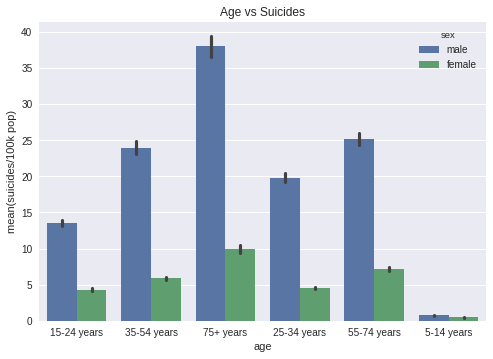

In [50]:
g=sns.barplot(x="age",y="suicides/100k pop",hue="sex",data=df_1)
g.set_title("Age vs Suicides")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5, 1.0, 'Deacde vs Suicides')

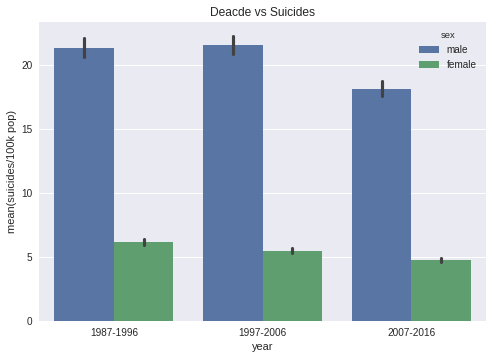

In [57]:
  g= sns.barplot(x="year",y="suicides/100k pop",hue="sex",data=df_1)
  g.set_title("Deacde vs Suicides")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Gender vs Suicides')

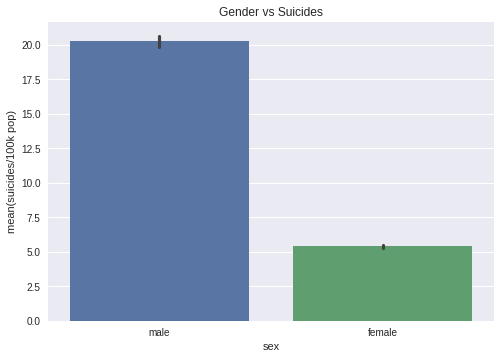

In [59]:
g= sns.barplot(x="sex",y="suicides/100k pop",data=df_1)
g.set_title("Gender vs Suicides")

In [74]:
country_df = df_1.groupby("country").sum().reset_index()
country_df.head()

,country,suicides/100k pop,gdp_per_capita ($)
0,Albania,924.76,490788
1,Antigua and Barbuda,179.14,3385212
2,Argentina,3894.59,2944044
3,Armenia,976.21,558428
4,Aruba,1596.52,4069236


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

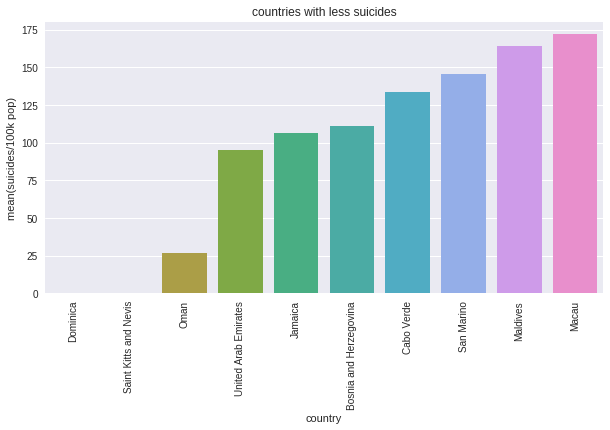

In [75]:
plt.figure(figsize=(10,5))
best_10 = country_df.sort_values(by = "suicides/100k pop",ascending= True)[:10]
sns.barplot(x = "country", y = "suicides/100k pop", data = best_10).set_title("countries with less suicides")
plt.xticks(rotation=90)

In [89]:
zone_acess = df_1.groupby(["country","year"]).sum().reset_index()
zone_df.head()

,country,year,suicides/100k pop,gdp_per_capita ($)
0,Albania,1987-1996,264.62,68940
1,Albania,1997-2006,481.58,214476
2,Albania,2007-2016,178.56,207372
3,Antigua and Barbuda,1987-1996,32.24,835836
4,Antigua and Barbuda,1997-2006,123.30,1219440


In [87]:
three_gen = zone_df.country.value_counts().reset_index(name = "count")
three_gen.columns = ["country", "counts"]
three_gen_countries = three_gen[three_gen.counts == 3].country.tolist()


,country,counts
0,Ecuador,3
1,Belgium,3
2,Bahamas,3
3,Uzbekistan,3
4,Spain,3


In [0]:
nations = three_gen_countries
years = zone_df.year.unique()
green_zones = []
danger_zones = []
for country in nations:
    s_year1 = float(zone_df[(zone_df.country == country) & (zone_df.year == "1987-1996")]["suicides/100k pop"])
    s_year2 = float(zone_df[(zone_df.country == country) & (zone_df.year == "1997-2006")]["suicides/100k pop"])
    s_year3 = float(zone_df[(zone_df.country == country) & (zone_df.year == "2007-2016")]["suicides/100k pop"])
    if s_year1 <= s_year2 <= s_year3:
        danger_zones.append(country)
    if s_year1 >= s_year2 >= s_year3:
        green_zones.append(country)
        

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

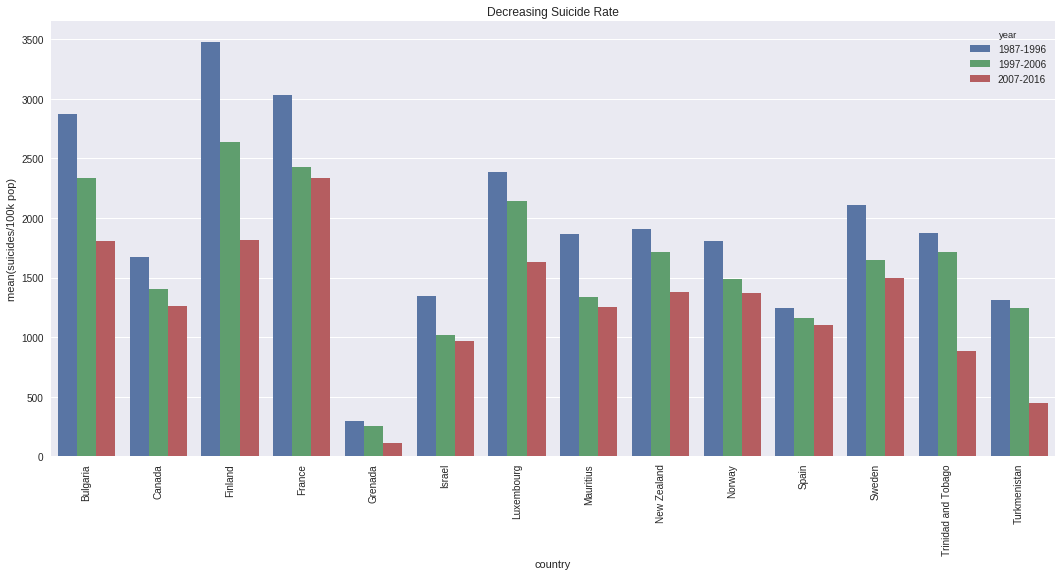

In [94]:
plt.figure(figsize=(18,8))
sns.barplot(x = "country", y = "suicides/100k pop", hue = "year",data = zone_df[zone_df.country.isin(green_zones)]).set_title("Decreasing Suicide Rate")
plt.xticks(rotation = 90)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

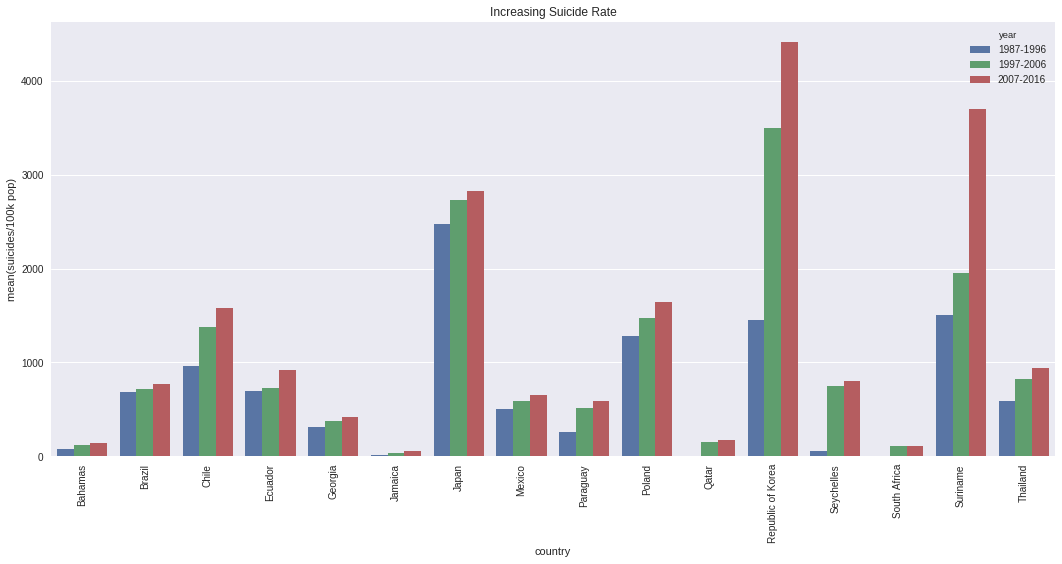

In [96]:
plt.figure(figsize=(18,8))
sns.barplot(x = "country", y = "suicides/100k pop", hue = "year",data = zone_df[zone_df.country.isin(danger_zones)]).set_title("Increasing Suicide Rate")
plt.xticks(rotation = 90)